# Basic Gates

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `CNOT`
Two-qubit controlled-NOT.

Registers:
 - ctrl: One-bit control register.
 - target: One-bit target register.

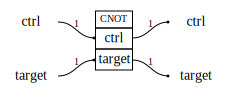

In [2]:
from qualtran.bloqs.basic_gates import CNOT

bloq = CNOT()
show_bloq(bloq)

We show how CNOT is represented as a facorized tensor during Quimb tensor simulation.

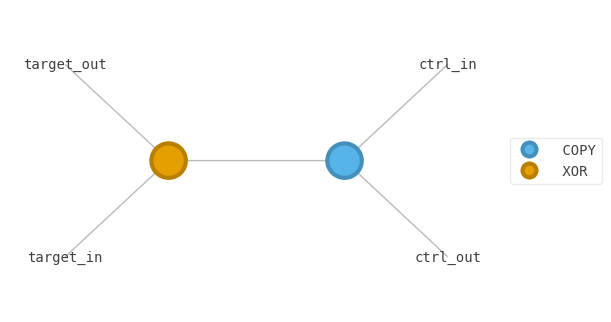

In [3]:
from qualtran.simulation.quimb_sim import (
    cbloq_to_quimb, get_right_and_left_inds
)

cbloq = bloq.as_composite_bloq()
tn, _ = cbloq_to_quimb(cbloq)

# Rename the indices to something less verbose
from qualtran._infra.composite_bloq import _get_dangling_soquets
lsoqs = _get_dangling_soquets(cbloq.signature, right=False)
rsoqs = _get_dangling_soquets(cbloq.signature, right=True)

# Note: the following only works for single-dimension soquets.
rename = {lsoqs[k]: f'{k}_in' for k in lsoqs.keys()}
rename |= {rsoqs[k]: f'{k}_out' for k in rsoqs.keys()}
tn = tn.reindex(rename)

tn.draw(color=['COPY', 'XOR'], show_tags=False, initial_layout='spectral')

In [4]:
bloq.tensor_contract()

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

## `PlusState`
The state |+>

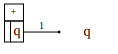

In [5]:
from qualtran.bloqs.basic_gates import PlusState

bloq = PlusState()
show_bloq(bloq)

In [6]:
bloq.tensor_contract()

array([0.70710678+0.j, 0.70710678+0.j])

## Bell State

We can create a bell state (|00> + |11>) by cnotting a |+> state into a |0> state.

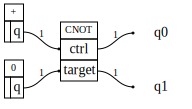

In [7]:
from qualtran.bloqs.basic_gates import ZeroState

bb = BloqBuilder()

q0 = bb.add(PlusState())
q1 = bb.add(ZeroState())

q0, q1 = bb.add(CNOT(), ctrl=q0, target=q1)

cbloq = bb.finalize(q0=q0, q1=q1)
show_bloq(cbloq)

In [8]:
cbloq.tensor_contract()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

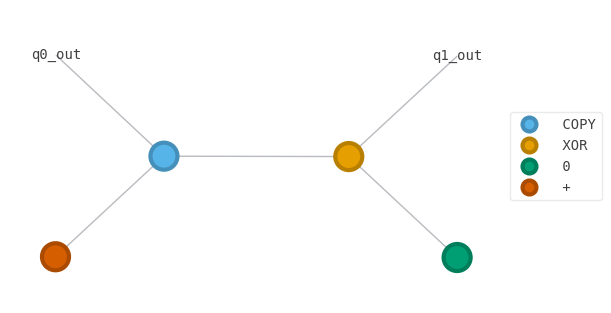

In [9]:
tn, _ = cbloq_to_quimb(cbloq)
lsoqs = _get_dangling_soquets(cbloq.signature, right=False)
rsoqs = _get_dangling_soquets(cbloq.signature, right=True)

# Note: the following only works for single-dimension soquets.
rename = {lsoqs[k]: f'{k}_in' for k in lsoqs.keys()}
rename |= {rsoqs[k]: f'{k}_out' for k in rsoqs.keys()}
tn = tn.reindex(rename)

tn.draw(color=['COPY', 'XOR', '0', '+'], show_tags=False, initial_layout='spectral')

## `Rz`
Single-qubit Rz gate.

#### Parameters
 - `angle`: Rotation angle.
 - `eps`: precision for implementation of rotation. 

Registers:
    - q: One-bit register.

#### References
[Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320), which offers a small improvement [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf).


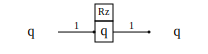

In [10]:
from qualtran.bloqs.basic_gates import Rz

bloq = Rz(angle=np.pi / 4.0)
show_bloq(bloq)